# Assignment A
# Question 1.1

In [1]:
#We need to import the corresponding Pandas, NumPy and MatplotLib libraries
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt

cols = [ 
    'timePeriod', 
    'practice_code', 
    'practice_name', 
    'practice_organization', 
    'street', 
    'city', 
    'area', 
    'postcode']


In [2]:
# We load the data as a DataFrame from the CSV file
# https://files.digital.nhs.uk/20/09E30B/T201804ADDR%20BNFT.CSV
gp_data = pd.read_csv('D:\DATA\GPprescribingdata\T201804ADDR+BNFT.csv', sep=',',header=None, names=cols,index_col=False).rename(columns=lambda x: x.strip())
gp_data.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


In [3]:
# For ease of reading lets capitalize only the first letter in the street, city, and area column's data

gp_data["city"] = gp_data["city"].map( lambda x: x.capitalize())
gp_data["area"] = gp_data["area"].map( lambda x: x.capitalize())
gp_data["street"] = gp_data["street"].map( lambda x: x.capitalize())

gp_data.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,Lawson street,Stockton-on-tees,Cleveland,TS18 1HU
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,Farrer street,Stockton on tees,Cleveland,TS18 2AW
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,Acklam,Middlesbrough,,TS5 8SB
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,Rectory lane,Guisborough,,TS14 7DJ
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,Tennant street,Stockton-on-tees,Cleveland,TS18 2AT


In [4]:
gp_data['city'] = gp_data['city'].apply(lambda x: x.strip()) # This will get erase the extra white spaces that each cell has.

In [5]:
gp_data['city'].unique() # Provides the individual string values present in the "City" column.

array(['Stockton-on-tees', 'Stockton on tees', 'Middlesbrough', ...,
       'Bilsthorpe', 'Yate  bristol', 'South bank'], dtype=object)

In [6]:
gp_data.info() # DataFrame has 9,578 rows corresponding to the data of 9,578 England's practices that reported on April, 2018. 
# There are no missing values in this DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 8 columns):
timePeriod               9578 non-null int64
practice_code            9578 non-null object
practice_name            9578 non-null object
practice_organization    9578 non-null object
street                   9578 non-null object
city                     9578 non-null object
area                     9578 non-null object
postcode                 9578 non-null object
dtypes: int64(1), object(7)
memory usage: 598.7+ KB


For the assignment, we want to exctract the information for the general practices located in the city of London.

In [7]:
gp_london = gp_data[gp_data['city'].str.contains("London")] # filters according to strings in the 'city' column that contain the string 'London' in them.
gp_london.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
1851,201804,E82113,COLNEY MEDICAL CENTRE,COLNEY MEDICAL CENTRE,45 kings road,London colney,Hertfordshire,AL2 1ES
1921,201804,E83649,THE HODFORD ROAD PRACTICE,73 HODFORD ROAD,,London,,NW11 8NH
1942,201804,E84023,PARK HOUSE MEDICAL CENTRE,18 HARVIST ROAD,Queen's park,London,,NW6 6SD
1974,201804,E84077,THE SHELDON PRACTICE,19 CHICHELE ROAD,,London,,NW2 3AH
2056,201804,E85074,BROOK GREEN SURGERY,15 BROOK GREEN,Hammersmith,London,,W6 7BL


In [8]:
print(gp_london.shape) # Gives the shape in rows (56) and columns (8)

(56, 8)


The number of practices doesn't reflect the amount of inhabitants that London has, 8 million, for only 56 practices. There has to be some kind of confounding factor that affects the data filtered. In this case, we will also take a look at what are the individual data strings present in the "City" column.

In [9]:
pd.unique(gp_london['city']) 

array(['London colney', 'London', 'London road'], dtype=object)

There is a set of 3 strings that contain the word 'London': "London", "London colney" and "London road". 
Then, we analize "Area" column to see if there are more practices that we haven't been accounting for that actually are in London but their address was recorded in a different format.

In [10]:
gp_london_a = gp_data[gp_data['area'].str.contains("London")] # filters according to strings in the 'city' column that contain the string 'London' in them.
gp_london_a.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
1873,201804,E83003,OAKLEIGH ROAD HEALTH CENTRE,OAKLEIGH ROAD HEALTH CTR,280 oakleigh road north,Whetstone,London,N20 0DH
1874,201804,E83005,LICHFIELD GROVE SURGERY,64 LICHFIELD GROVE,,Finchley,London,N3 2JP
1875,201804,E83006,GREENFIELD MEDICAL CENTRE,GREENFIELD MEDICAL CENTRE,143-145 cricklewood lane,Cricklewood,London,NW2 1HS
1876,201804,E83007,SQUIRES LANE MEDICAL PRACTICE,2 SQUIRES LANE,,Finchley,London,N3 2AU
1877,201804,E83008,HEATHFIELDE MEDICAL CENTRE,HEATHFIELDE MEDICAL CTR,Lyttleton road finchley,Barnet,London,N2 0EQ


In [11]:
print(gp_london_a.shape) 

(876, 8)


Indeed. There is a big number of practices, 876, whose address format took "London" as the area in which they are present, instead of the city, but we would need to take both dataframes into acount since most of the ones in the London "City" don't have an "Area" string, so we would need to concatenate them into one with all the 932 practices.

In [12]:
all_london_gp = pd.concat([gp_london, gp_london_a]) #concatenates rows of one DataFrame after the other to create a new DF containing all the practices in London.

In [13]:
all_london_gp.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
1851,201804,E82113,COLNEY MEDICAL CENTRE,COLNEY MEDICAL CENTRE,45 kings road,London colney,Hertfordshire,AL2 1ES
1921,201804,E83649,THE HODFORD ROAD PRACTICE,73 HODFORD ROAD,,London,,NW11 8NH
1942,201804,E84023,PARK HOUSE MEDICAL CENTRE,18 HARVIST ROAD,Queen's park,London,,NW6 6SD
1974,201804,E84077,THE SHELDON PRACTICE,19 CHICHELE ROAD,,London,,NW2 3AH
2056,201804,E85074,BROOK GREEN SURGERY,15 BROOK GREEN,Hammersmith,London,,W6 7BL


In [14]:
print(all_london_gp.shape)

(932, 8)


In [15]:
#We load the prescription data into a new DataFrame
#https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV
presc_data = pd.read_csv('D:\DATA\GPprescribingdata\T201804PDPI+BNFT.csv', sep=',').rename(columns=lambda x: x.lower().strip())
presc_data.head(10)

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,
5,Q44,RTV,Y04937,0402010ADAAABAB,Aripiprazole_Tab 15mg,1,1.61,1.61,14,201804,
6,Q44,RTV,Y04937,0402010D0AAAIAI,Chlorpromazine HCl_Tab 25mg,1,18.57,17.33,14,201804,
7,Q44,RTV,Y04937,040201060AAACAC,Olanzapine_Tab 10mg,1,18.98,17.61,28,201804,
8,Q44,RTV,Y04937,0402030Q0BBABAB,Depakote_Tab G/R 500mg,1,21.22,19.79,56,201804,
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804,


In [16]:
presc_data.shape

(9748354, 11)

In [17]:
presc_data.describe()

,items,nic,act cost,quantity,period
count,9.748354e+06,9.748354e+06,9.748354e+06,9.748354e+06,9748354.0
mean,9.115409e+00,7.078242e+01,6.597908e+01,7.135560e+02,201804.0
std,2.999382e+01,1.918400e+02,1.782526e+02,4.124964e+03,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,201804.0
25%,1.000000e+00,7.920000e+00,7.460000e+00,2.800000e+01,201804.0
50%,2.000000e+00,2.250000e+01,2.112000e+01,9.000000e+01,201804.0
75%,6.000000e+00,6.286000e+01,5.868000e+01,3.360000e+02,201804.0
max,5.147000e+03,3.391873e+04,3.145594e+04,2.281694e+06,201804.0


The prescription data gives us 9,748,354 individual medicines, dressings and appliances that were prescripted by practices in England on April, 2018. This data doesn't include private prescriptions, only prescriptions whose cost is covered by the NHS.
On a first glance, this data tells us a few basic things about the prescriptions made on that month. By following the "Items" column, the average medication was prescripted 9.12 times, and the the most had been prescribed 5,147 times in April. The average cost the drugs prescripted in England was £65.97, with the most expensive costing £31,456. The "NIC" column indicates the net ingredient cost per 1 item, which is generally different than what the NHS actually covers since it takes different factors into its price. It does not take into account of any contract prices or discounts, dispensing costs, fees or prescription charge income, so the amount the NHS paid will be different. Ref:  https://digital.nhs.uk/data-and-information/areas-of-interest/prescribing/practice-level-prescribing-in-england-a-summary/practice-level-prescribing-glossary-of-terms#net-ingredient-cost-nic-

In [18]:
#This loads the patients demographics data into a new DataFrame
#https://files.digital.nhs.uk/71/B59D99/gp-reg-pat-prac-all.csv

patients_data = pd.read_csv('D:\DATA\demographics breakdown for GP surgeries\gp-reg-pat-prac-all.csv', sep=',',index_col=False).rename(columns=lambda x: x.lower().strip())
patients_data.head()

,publication,extract_date,type,ccg_code,ons_ccg_code,code,postcode,sex,age,number_of_patients
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [19]:
patients_data.shape

(7241, 10)

In [20]:
patients_data.describe()

,number_of_patients
count,7241.000000
mean,8153.514017
std,5184.888435
min,1.000000
25%,4501.000000
50%,7235.000000
75%,10711.000000
max,72227.000000


Here we have that GPs throughout England reported their registered patients up until April, 2018. A basic stastistical description tells us that the average English practice has 8,154 registered patients, the one that has the least patients has only one, meanwhile the one that has the most has 72,227, although, this could be an outlier in the data.

In [21]:
practice_codes = all_london_gp.practice_code # creates a pandas Series with the practice codes from the London practices.
print(practice_codes.head())

1851    E82113
1921    E83649
1942    E84023
1974    E84077
2056    E85074
Name: practice_code, dtype: object


In [22]:
print(type(practice_codes))

<class 'pandas.core.series.Series'>


In [23]:
practice_codes.count() #non Null values

932

In [24]:
#Here we filter the patients_data Dataframe that contains the patients from England with the corresponding
#practice code from the London practices and create a new DF to store the information.
london_gp_demog = patients_data.loc[patients_data['code'].isin(practice_codes)]
london_gp_demog.head()

,publication,extract_date,type,ccg_code,ons_ccg_code,code,postcode,sex,age,number_of_patients
3320,GP_PRAC_PAT_LIST,01APR2018,GP,06N,E38000079,E82113,AL2 1ES,ALL,ALL,4148
3664,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,Y04786,IG3 8YB,ALL,ALL,443
3665,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83003,N20 0DH,ALL,ALL,8911
3666,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83005,N3 2JP,ALL,ALL,6224
3667,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83006,NW2 1HS,ALL,ALL,6885


In [25]:
london_gp_demog.shape

(748, 10)

We have data from 748 GPs in London. This is in contrast with the amount of practice codes we obtained from the London "City"  and "Area" DataFrames, which gave us 932 practices. There is missing data for 184 practices, which could be explained by either practices that didn’t report on the month of interest, or that closed during April, or two or more that fused into only one practice. Also, dummy practices are included in the data.

In [26]:
london_gp_demog.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 3320 to 4950
Data columns (total 10 columns):
publication           748 non-null object
extract_date          748 non-null object
type                  748 non-null object
ccg_code              748 non-null object
ons_ccg_code          748 non-null object
code                  748 non-null object
postcode              748 non-null object
sex                   748 non-null object
age                   748 non-null object
number_of_patients    748 non-null int64
dtypes: int64(1), object(9)
memory usage: 64.3+ KB


In [27]:
london_gp_demog.describe() # Basic statistics of patients registered in London practices.

,number_of_patients
count,748.000000
mean,7815.647059
std,5063.536774
min,8.000000
25%,4555.500000
50%,6988.500000
75%,10226.000000
max,72227.000000


The describe function of tells us the following basic statistics:
   * Mean number of patients per practice in London is 7,816.
   * The practice with the least patients has 8 registered.
   * Maximum number of patients in a practice: 72,227. This could be an outlier from the data reported incorrectly. 
   * The median number tells us that half of the practices have more than 6,989 patients.
   * The smallest quartile has less than 4,556 patients.
   * The biggest quartile has at least 10,226 patients.
   
Since patients numbers are integers and not floats, we can infer that the 0.5 extra patients in the quartiles is because of the number of practices and the position where calculation is done.

In [28]:
london_patients = london_gp_demog['number_of_patients'].sum() #Total number of patients registered at a practice in London
print("The number of all patients in London registered to a practice is " + str("{:,}".format(london_patients)) + ".")

The number of all patients in London registered to a practice is 5,846,104.


In [29]:
# Filtering of the prescription data to get only the ones from the London GP practices
london_gp_presc= presc_data.loc[presc_data['practice'].isin(practice_codes)]
london_gp_presc.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
1876728,Q49,01H,Y00433,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1,2.99,2.79,500,201804,
1876729,Q49,01H,Y00433,0101010R0BCAAAB,Infacol_Susp 40mg/ml S/F,1,2.71,2.53,50,201804,
1876730,Q49,01H,Y00433,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,7,38.56,35.84,120,201804,
1876731,Q49,01H,Y00433,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),1,1.54,1.54,150,201804,
1876732,Q49,01H,Y00433,0101021B0BEAJAM,Gaviscon_Liq Sach 10ml (Peppermint) S/F,1,3.03,2.82,12,201804,


In [30]:
london_gp_presc.describe()

,items,nic,act cost,quantity,period
count,806139.000000,806139.000000,806139.000000,806139.000000,806139.0
mean,7.304218,57.568961,53.798413,633.450736,201804.0
std,22.165315,144.894340,134.744718,3581.558474,0.0
min,1.000000,0.010000,0.090000,0.000000,201804.0
25%,1.000000,6.840000,6.500000,28.000000,201804.0
50%,2.000000,18.700000,17.630000,100.000000,201804.0
75%,5.000000,52.700000,49.360000,300.000000,201804.0
max,2012.000000,13262.850000,12338.020000,980000.000000,201804.0


The prescription data for London gives us data for 806,139 individual medications that were prescripted on April, 2018. On a first glance, this data tells us a few basic things about the prescriptions made on that month. 

The average medication was prescripted 7.3 times, and the most was prescribed 2,012 times in April. The average cost of the drugs prescribed in London was £53.60, with the most expensive costing £12,338. 

In [31]:
#According to the NHS documentation (https://digital.nhs.uk/data-and-information/areas-of-interest/prescribing/practice-level-prescribing-in-england-a-summary/practice-level-prescribing-glossary-of-terms#items)
#We need to do a sum of the 'ITEMS' column to get the total number of prescriptions made at GP practices in London.
london_presc_totaln = london_gp_presc['items'].sum()
print("The total number of prescriptions given by London practices was " + str("{:,}".format(london_presc_totaln)) + ".")

The total number of prescriptions given by London practices was 5,888,215.


In [32]:
london_gp_presc['presc_total'] =  london_gp_presc['act cost'] * london_gp_presc['items'] # Calculates the total cost of each prescription item and adds a new column with
# that data to the dataframe.
london_gp_presc.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
1876728,Q49,01H,Y00433,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1,2.99,2.79,500,201804,,2.79
1876729,Q49,01H,Y00433,0101010R0BCAAAB,Infacol_Susp 40mg/ml S/F,1,2.71,2.53,50,201804,,2.53
1876730,Q49,01H,Y00433,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,7,38.56,35.84,120,201804,,250.88
1876731,Q49,01H,Y00433,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),1,1.54,1.54,150,201804,,1.54
1876732,Q49,01H,Y00433,0101021B0BEAJAM,Gaviscon_Liq Sach 10ml (Peppermint) S/F,1,3.03,2.82,12,201804,,2.82


In [33]:
london_presc_totalcost = london_gp_presc['presc_total'].sum() # Sums the total cost of prescrptions paid.

In [34]:
print("The total cost of the prescriptions given by London practices was £" + str("{:,}".format(int(london_presc_totalcost))) + "." ) 

The total cost of the prescriptions given by London practices was £1,000,820,487.


In [35]:
london_presc_sorted = london_gp_presc.sort_values('items', axis=0, ascending=False, kind='quicksort', na_position='last') # sorts prescriptions based on number of items.
london_presc_sorted.head(10) # identifies the 10 most prescripted drugs.

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
6249702,Q61,07X,Y03402,1404000H0AAAKAK,Influenza_Vac SplitViron Inact 0.5ml Pfs,2012,13259.08,12296.36,2012,201804,,24740276.32
7299819,Q63,08Q,G85034,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,1885,1424.43,1438.32,66473,201804,,2711233.20
7301081,Q63,08Q,G85034,0601022B0AAABAB,Metformin HCl_Tab 500mg,1654,5078.09,4770.96,157954,201804,,7891167.84
7300101,Q63,08Q,G85034,0206020A0AAABAB,Amlodipine_Tab 10mg,1578,3175.91,3037.49,56218,201804,,4793159.22
7300208,Q63,08Q,G85034,0212000B0AAABAB,Atorvastatin_Tab 20mg,1548,1287.01,1292.84,51322,201804,,2001316.32
7300209,Q63,08Q,G85034,0212000B0AAACAC,Atorvastatin_Tab 40mg,1378,1204.49,1225.39,34285,201804,,1688587.42
7300100,Q63,08Q,G85034,0206020A0AAAAAA,Amlodipine_Tab 5mg,1313,2191.75,2114.40,42883,201804,,2776207.20
7300629,Q63,08Q,G85034,0407010H0AAAMAM,Paracet_Tab 500mg,1205,1226.11,1195.59,126500,201804,,1440685.95
7300236,Q63,08Q,G85034,0301011R0AAAPAP,Salbutamol_Inha 100mcg (200 D) CFF,1096,2626.50,2449.40,1751,201804,,2684542.40
6382225,Q61,08M,F84006,0601022B0AAABAB,Metformin HCl_Tab 500mg,1090,2581.58,2419.76,80314,201804,,2637538.40


In [36]:
london_presc_sorted.tail(10)

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
6588395,Q62,07P,E84021,23944809742,ConvaTec_Esteem Syner Skin Barrier+Flx C,1,150.24,139.33,40,201804,,139.33
6588394,Q62,07P,E84021,23944809690,ConvaTec_C/Sive Natura High Output Drnbl,1,129.06,119.69,30,201804,,119.69
6588390,Q62,07P,E84021,23804108012,Salts_Barrier Film Wipes,1,16.04,14.88,30,201804,,14.88
6588389,Q62,07P,E84021,23803108010,3m Health Care_Cavilon No Sting Barrier,1,11.58,10.75,2,201804,,10.75
6588385,Q62,07P,E84021,23803068007,Medicareplus_Medi Derma-S N/Sting Medic,1,8.95,8.31,50,201804,,8.31
6588384,Q62,07P,E84021,23803068006,Medicareplus_Medi Derma-S Barrier Crm 28,1,2.98,2.78,1,201804,,2.78
6588383,Q62,07P,E84021,23803068001,Medicareplus_Medi Derma-S Barrier Crm 90,1,11.90,11.05,2,201804,,11.05
6588382,Q62,07P,E84021,23800908004,CliniMed_LBF Ster No Sting Barrier Film,1,25.59,23.73,1,201804,,23.73
6588371,Q62,07P,E84021,23051009001,Coloplast_Brava Elas Tape,1,39.57,36.70,60,201804,,36.70
6618677,Q62,07P,E84656,1003020N0BDAAAK,Balmosa_Crm,1,1.75,1.64,40,201804,,1.64


In [37]:
london_presc_one_item = london_presc_sorted[london_gp_presc['items'] == 1] # filters the data to obtain items prescribed only once.
london_presc_one_item.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
7442292,Q63,08X,Y02946,0906060Q0AAASAS,Phytomenadione_Oral/IM/IV 2mg/0.2ml Amp,1,28.26,26.22,30,201804,,26.22
7096011,Q63,07V,Y05317,0208010W0AAASAS,Tinzaparin Sod_Inj 20 000u/ml 0.6ml Pfs,1,199.92,185.52,28,201804,,185.52
7396360,Q63,08X,H85002,0501021L0AAAAAA,Cefalexin_Cap 250mg,1,1.04,1.08,20,201804,,1.08
7396501,Q63,08X,H85002,0606020W0AAADAD,Ibandronic Acid_Tab 150mg,1,2.49,2.32,3,201804,,2.32
7396491,Q63,08X,H85002,0604011L0BKADBD,Femoston-conti_Tab 1mg/5mg,1,24.43,22.67,84,201804,,22.67


In [38]:
london_presc_one_item.shape

(342444, 12)

The less frequent items prescribed comprise a list of 342,444 items prescribed only once in London practices. Next, this data will be filtered to keep only the drugs prescribed.

In [39]:
bnf_group_list = []                                 # this creates a list of strings containing the first 2 digits, from
                                                    # 01 to 15, of the BNF drug codes.  
bnf_drugs_frst_digit = ["0", "1"]

for digit in bnf_drugs_frst_digit:

    if digit == "0":

        for i in range(0,10):
            if i < 10:
                bnf_group_list.append("0" + str(i))
            else:
                bnf_group_list.append( + str(i))
        
    else:
        for i in range(0, 6):
                bnf_group_list.append("1" + str(i))
            

print(bnf_group_list)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']


In [40]:
london_presc_one_item.rename(columns={'bnf code':'bnf_code'}, inplace=True)

drugs_1_item_lndn = pd.DataFrame()

for group in bnf_group_list: # creates a new dataframe with drugs prescribed only once in London.
    drugs_1_item_lndn = drugs_1_item_lndn.append(london_presc_one_item[(london_presc_one_item.bnf_code.str.startswith(group))])
    
drugs_1_item_lndn.reset_index(drop=True).head()

c:\program files\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,sha,pct,practice,bnf_code,bnf name,items,nic,act cost,quantity,period,,presc_total
0,Q63,08X,H85691,0107020J0BCAAAB,Anusol HC_Suppos,1,2.90,2.80,20,201804,,2.80
1,Q63,07V,Y05317,0107020J0BEABAF,Proctosedyl_Suppos,1,5.08,4.72,12,201804,,4.72
2,Q63,08R,H85051,0103050P0AABCBC,Omeprazole_Tab E/C 10mg,1,3.95,3.78,14,201804,,3.78
3,Q63,08A,G83060,0102000N0BBAAAB,Buscopan_Tab 10mg,1,1.61,1.61,30,201804,,1.61
4,Q63,08X,H85691,0106040N0BDAAAD,Cleen_Enem Phos 133ml,1,1.36,1.27,2,201804,,1.27


In [41]:
drugs_1_item_lndn.shape

(285500, 12)

This data was filtered to exclude dressings and appliances and keep the information exclusively for drugs, which BNF code starts with two digits from 01 to 15. This resulted in a list containing 285,500 individual drugs. A sample of the ten most expensive drugs prescribed only once is presented in the following table.

In [42]:
drugs_1_item_lndn.sort_values('act cost', ascending = False).head(10)

,sha,pct,practice,bnf_code,bnf name,items,nic,act cost,quantity,period,,presc_total
6426536,Q61,08M,F84730,0208020N0AAAAAA,Phenindione_Tab 10mg,1,5919.98,5490.15,308,201804,,5490.15
7204898,Q63,08K,G85662,0908010C0AAAGAG,Levocarnitine_Oral Soln Paed 1.5g/5ml,1,4426.80,4105.39,1240,201804,,4105.39
6888272,Q62,08Y,E87043,0605010S0BBAJAT,Genotropin_Inj 12mg Cart + Dil,1,4173.00,3870.03,20,201804,,3870.03
7189865,Q63,08K,G85086,0602010M0AAAAAA,Liothyronine Sod_Tab 20mcg,1,3947.04,3660.46,448,201804,,3660.46
6492200,Q61,08V,F84031,0401010T0AAAEAE,Temazepam_Oral Soln 10mg/5ml S/F,1,3388.80,3142.76,6000,201804,,3142.76
6770269,Q62,08C,E85074,0407020H0AAABAB,Dipipanone HCl/Cyclizine HCl_Tab 10/30mg,1,3092.24,2867.73,400,201804,,2867.73
6204609,Q61,07X,F85020,0605010S0BEAEBA,Norditropin SimpleXx_Inj 30u 10mg/1.5ml,1,2977.80,2761.60,14,201804,,2761.60
6879015,Q62,08Y,E87007,0605010S0BEAEBA,Norditropin SimpleXx_Inj 30u 10mg/1.5ml,1,2977.80,2761.60,14,201804,,2761.60
6119385,Q61,07R,F83003,0403020Q0AAAAAA,Tranylcypromine Sulf_Tab 10mg,1,2898.00,2687.59,336,201804,,2687.59
6202300,Q61,07X,F85015,0802040AKAAABAB,Dimethyl Fumar_Cap E/C 240mg,1,2746.00,2546.63,112,201804,,2546.63


# Question A.2
# Cambridge
Now we will do the same analysis for the city of Cambridge.

In [43]:
gp_cambridge = gp_data[gp_data['city'].str.contains("Cambridge")]
gp_cambridge.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
1455,201804,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 lensfield road,Cambridge,Cambridgeshire,CB2 1EH
1456,201804,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 huntingdon road,Cambridge,,CB3 0DB
1457,201804,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 york street,Cambridge,Cambridgeshire,CB1 2PY
1459,201804,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,Wordsworth grove,Cambridge,Cambridgeshire,CB3 9HS
1462,201804,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,Ashen green grt shelford,Cambridge,Cambridgeshire,CB22 5FY


In [44]:
gp_cambridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1455 to 9438
Data columns (total 8 columns):
timePeriod               35 non-null int64
practice_code            35 non-null object
practice_name            35 non-null object
practice_organization    35 non-null object
street                   35 non-null object
city                     35 non-null object
area                     35 non-null object
postcode                 35 non-null object
dtypes: int64(1), object(7)
memory usage: 2.5+ KB


We won't do the merge of "City" and "Area" data for Cambridge as we did for London, since there are big number that are from Cambridgeshire but aren't in the city of Cambdrige. We have data for 35 GPs in the city of Cambridge.

In [45]:
cambridge_codes = gp_cambridge.practice_code
cambridge_codes.head()

1455    D81001
1456    D81002
1457    D81003
1459    D81005
1462    D81009
Name: practice_code, dtype: object

In [46]:
cambridge_gp_demog = patients_data.loc[patients_data['code'].isin(cambridge_codes)]
cambridge_gp_demog.shape

(30, 10)

We have five GPs whose data we are missing. Out of 35, it is a big proportion of missing data.

In [47]:
cambridge_gp_demog.head()

,publication,extract_date,type,ccg_code,ons_ccg_code,code,postcode,sex,age,number_of_patients
3050,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
3051,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81002,CB3 0DB,ALL,ALL,16939
3052,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81003,CB1 2PY,ALL,ALL,9927
3054,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81005,CB3 9HS,ALL,ALL,14941
3057,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81009,CB22 5FY,ALL,ALL,9071


In [48]:
cambridge_gp_demog.describe()

,number_of_patients
count,30.000000
mean,10029.500000
std,6382.131164
min,568.000000
25%,6054.250000
50%,8760.500000
75%,12230.250000
max,33501.000000


The describe function of tells us the following basic statistics:

* Mean number of patients per practice in Cambridge is 10,029.
* The practice with the least patients has 568 registered.
* Maximum number of patients in a practice: 33,501. This could be an outlier from the data reported incorrectly.
* The median number tells us that half of the practices have more than 8,760 patients.
* The smallest quartile has less than 6,054 patients.
* The biggest quartile has at least 12,230 patients.

It is interesting to note that all these numbers are higher for Cambridge than for London, suggesting that there is a higher pressure by the Cambridge population on the primary care services, due to a lack of practices relative to the city population. 

In [49]:
cambridge_patients = cambridge_gp_demog['number_of_patients'].sum() #Total number of patients registered at a practice in Cambridge
print("The number of all patients in Cambridge registered to a practice is " + str("{:,}".format(cambridge_patients)) + ".")

The number of all patients in Cambridge registered to a practice is 300,885.


In [50]:
cambridge_gp_presc = presc_data.loc[presc_data['practice'].isin(cambridge_codes)]
cambridge_gp_presc.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
4183977,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,3,12.13,11.29,2300,201804,
4183978,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,14.85,13.91,1450,201804,
4183979,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,11.85,11.10,1000,201804,
4183980,Q56,06H,D81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,2,9.64,8.96,30,201804,
4183981,Q56,06H,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,2,29.59,27.57,336,201804,


In [51]:
cambridge_presc_totaln = cambridge_gp_presc['items'].sum()
print("For Cambridge, the total number of prescriptions given by practices was " + str("{:,}".format(cambridge_presc_totaln)) + ".")

For Cambridge, the total number of prescriptions given by practices was 331,388.


In [52]:
cambridge_gp_presc['presc_total'] = cambridge_gp_presc['act cost'] * cambridge_gp_presc['items']
cambridge_gp_presc.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
4183977,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,3,12.13,11.29,2300,201804,,33.87
4183978,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,14.85,13.91,1450,201804,,41.73
4183979,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,11.85,11.10,1000,201804,,11.10
4183980,Q56,06H,D81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,2,9.64,8.96,30,201804,,17.92
4183981,Q56,06H,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,2,29.59,27.57,336,201804,,55.14


In [53]:
cambridge_presc_totalcost = cambridge_gp_presc['presc_total'].sum()
print("For Cambridge, the total cost of the prescriptions given by practices is £" + str("{:,}".format(int(cambridge_presc_totalcost))) + ".") 

For Cambridge, the total cost of the prescriptions given by practices is £65,134,534.


In [54]:
cambridge_gp_presc.describe()

,items,nic,act cost,quantity,period,presc_total
count,38868.000000,38868.000000,38868.000000,38868.000000,38868.0,3.886800e+04
mean,8.525985,64.747665,60.309027,626.022949,201804.0,1.675788e+03
std,29.328402,169.666762,157.545933,3069.794941,0.0,2.669731e+04
min,1.000000,0.000000,0.000000,0.000000,201804.0,0.000000e+00
25%,1.000000,7.780000,7.310000,28.000000,201804.0,1.150750e+01
50%,2.000000,21.140000,19.835000,90.000000,201804.0,4.641000e+01
75%,6.000000,57.800000,53.922500,308.000000,201804.0,2.388000e+02
max,2087.000000,8730.000000,8099.100000,159072.000000,201804.0,3.206613e+06


In [55]:
cambridge_presc_sorted = cambridge_gp_presc.sort_values('items', axis=0, ascending=False, kind='quicksort', na_position='last')
cambridge_presc_sorted.head(10)

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
4246482,Q56,06H,D81043,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,2087,1627.47,1536.47,75949,201804,,3206612.89
4246782,Q56,06H,D81043,0206020A0AAAAAA,Amlodipine_Tab 5mg,995,1390.98,1301.32,27239,201804,,1294813.40
4246901,Q56,06H,D81043,0212000B0AAABAB,Atorvastatin_Tab 20mg,955,670.96,632.75,25921,201804,,604276.25
4246885,Q56,06H,D81043,0209000A0AAABAB,Aspirin Disper_Tab 75mg,817,258.14,250.44,21917,201804,,204609.48
4246930,Q56,06H,D81043,0212000Y0AAADAD,Simvastatin_Tab 40mg,816,503.55,476.53,21693,201804,,388848.48
4247799,Q56,06H,D81043,0602010V0AABZBZ,Levothyrox Sod_Tab 100mcg,740,726.37,683.25,21186,201804,,505605.00
4247297,Q56,06H,D81043,0407010H0AAAMAM,Paracet_Tab 500mg,691,947.27,892.38,92043,201804,,616634.58
4185511,Q56,06H,D81002,0212000B0AAABAB,Atorvastatin_Tab 20mg,685,483.24,460.21,19313,201804,,315243.85
4247797,Q56,06H,D81043,0602010V0AABXBX,Levothyrox Sod_Tab 50mcg,678,645.04,608.60,18617,201804,,412630.80
4247796,Q56,06H,D81043,0602010V0AABWBW,Levothyrox Sod_Tab 25mcg,644,1218.97,1143.22,18247,201804,,736233.68


In [56]:
cambridge_presc_sorted.tail(10)

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
4244872,Q56,06H,D81041,0604020K0AABHBH,Testosterone_Gel 50mg/5g Ud Sach,1,62.22,57.71,60,201804,,57.71
4244869,Q56,06H,D81041,0604012S0AAALAL,Progesterone_Cap 100mg (Micronised),1,5.13,4.76,30,201804,,4.76
4244868,Q56,06H,D81041,0604012P0BBAAAA,Primolut N_Tab 5mg,1,2.26,2.10,30,201804,,2.10
4244867,Q56,06H,D81041,0604012M0BCABAE,Provera_Tab 10mg,1,7.42,6.88,30,201804,,6.88
4244865,Q56,06H,D81041,0604011X0AAAAAA,Raloxifene HCl_Tab 60mg,1,3.42,3.17,28,201804,,3.17
4244864,Q56,06H,D81041,0604011L0BVAABI,FemSeven Sequi_Patch,1,37.54,34.81,12,201804,,34.81
4244863,Q56,06H,D81041,0604011L0BRAABA,Kliovance_Tab,1,13.20,12.24,84,201804,,12.24
4244861,Q56,06H,D81041,0604011L0BPABAW,Elleste Duet_Tab 1mg,1,9.20,8.53,84,201804,,8.53
4244860,Q56,06H,D81041,0604011L0BPAAAT,Elleste Duet_Tab 2mg,1,9.20,8.53,84,201804,,8.53
4327784,Q56,06H,Y05839,21210000012,Salivix Pastil (App),1,3.55,3.30,50,201804,,3.30


For Cambridge the same situation happens, where multiple drugs are prescribed only once. The same analysis done for London is done next.

In [57]:
cambr_presc_one_item = cambridge_presc_sorted[cambridge_presc_sorted['items'] == 1] # filters the data to obtain items prescribed only once this time for Cambridge.
cambr_presc_one_item.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
4280379,Q56,06H,D81066,23603456132,Pelican_Select Afresh Drnbl Pouch Opqe S,1,261.18,242.22,90,201804,,242.22
4280410,Q56,06H,D81070,0103010T0AAAEAE,Ranitidine HCl_Oral Soln 75mg/5ml S/F,1,6.24,5.80,300,201804,,5.80
4283901,Q56,06H,D81078,0604011L0BPACAK,Elleste Duet Conti_Tab,1,17.02,15.80,84,201804,,15.80
4280390,Q56,06H,D81066,23850908505,CliniMed_Hyperseal Washers Sml (2.5mm th,1,51.68,47.93,40,201804,,47.93
4265802,Q56,06H,D81056,0601012X0AAABAB,Ins Detemir_Inj 100u/ml 3ml Pf Pen,1,42.00,38.96,5,201804,,38.96


In [58]:
cambr_presc_one_item.rename(columns={'bnf code':'bnf_code'}, inplace=True)

drugs_1_item_camb = pd.DataFrame()

for group in bnf_group_list: # creates a new dataframe with drugs prescribed only once in Cambridge.
    drugs_1_item_camb = drugs_1_item_camb.append(cambr_presc_one_item[(cambr_presc_one_item.bnf_code.str.startswith(group))])
    
drugs_1_item_camb.reset_index(drop=True).head()

,sha,pct,practice,bnf_code,bnf name,items,nic,act cost,quantity,period,,presc_total
0,Q56,06H,D81070,0103010T0AAAEAE,Ranitidine HCl_Oral Soln 75mg/5ml S/F,1,6.24,5.80,300,201804,,5.80
1,Q56,06H,D81607,0106040M0BBAJAB,Movicol_Paed Pdr Sach 6.9g (Choc),1,4.38,4.07,30,201804,,4.07
2,Q56,06H,D81070,0103050E0AAAAAA,Esomeprazole_Tab E/C 20mg,1,4.64,4.32,56,201804,,4.32
3,Q56,06H,D81607,0107020J0BCACAC,Anusol Plus HC_Oint,1,6.68,6.19,30,201804,,6.19
4,Q56,06H,D81070,0103050E0AAABAB,Esomeprazole_Tab E/C 40mg,1,11.64,10.81,112,201804,,10.81


In [59]:
drugs_1_item_camb.shape

(12993, 12)

There are 12,993 drugs prescribed only once in Cambridge during April, 2018. As done for London, for Cambridge the prescriptions corresponding to drugs that were prescribed only once was extracted. A sample of the ten most expensive drugs prescribed only once is presented in the following table.

In [60]:
drugs_1_item_camb.sort_values('act cost', ascending = False).head(10)

,sha,pct,practice,bnf_code,bnf name,items,nic,act cost,quantity,period,,presc_total
4187619,Q56,06H,D81003,0803043P0AAADAD,Lanreotide_Inj 120mg/0.5ml Pfs,1,1874.00,1737.94,2,201804,,1737.94
4195758,Q56,06H,D81009,0605010S0BCAGBS,Saizen_Inj 20mg/2.5ml Cart,1,1390.80,1289.83,3,201804,,1289.83
4290215,Q56,06H,D81086,090402000BBFHA0,Elemental 028 Ex_Pdr Sach 100g (3 Flav),1,1198.40,1111.40,160,201804,,1111.40
4207415,Q56,06H,D81016,0605010S0BBANAX,Genotropin MiniQuick_Inj 800mcg Pfs Cart,1,1168.44,1083.63,84,201804,,1083.63
4225941,Q56,06H,D81028,0401010ACBBAAAA,Xyrem_Oral Soln 500mg/ml,1,1080.00,1082.59,540,201804,,1082.59
4240455,Q56,06H,D81037,0605010S0BCAFBR,Saizen_Inj 12mg/1.5ml Cart,1,1112.64,1031.87,4,201804,,1031.87
4226621,Q56,06H,D81028,090402000BBIXA0,Modulen IBD_Pdr,1,1091.30,1012.07,28000,201804,,1012.07
4184696,Q56,06H,D81001,0605010S0BDAEAT,Humatrope_Inj 36u Cart + Dil (12mg),1,1080.00,1001.61,5,201804,,1001.61
4279985,Q56,06H,D81066,090401000BBHKA0,Phlexy-10_Drink Mix Pdr Sach 20g(3 Flav),1,1077.60,999.37,4800,201804,,999.37
4201055,Q56,06H,D81012,0604011D0AAALAL,Ethinylestr_Tab 2mcg,1,1062.10,984.99,168,201804,,984.99


# Question A.3
### a) CVD medication throughout England (British National Formulary chapter 2).

In [61]:
presc_data.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [62]:
cvd_presc = presc_data[presc_data['bnf code'].str.startswith('02')] # creates a new DF with only drugs from Chapter 2 of BNF.
cvd_presc.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804,
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804,
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804,
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804,
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804,


In [63]:
cvd_presc.shape

(1330453, 11)

In [64]:
cvd_presc.describe()

,items,nic,act cost,quantity,period
count,1.330453e+06,1.330453e+06,1.330453e+06,1.330453e+06,1330453.0
mean,1.988032e+01,7.244774e+01,6.779182e+01,7.014619e+02,201804.0
std,4.953341e+01,2.723470e+02,2.529035e+02,1.625051e+03,0.0
min,1.000000e+00,1.000000e-02,7.000000e-02,1.000000e+00,201804.0
25%,1.000000e+00,6.850000e+00,6.490000e+00,5.600000e+01,201804.0
50%,4.000000e+00,1.803000e+01,1.697000e+01,1.540000e+02,201804.0
75%,1.500000e+01,4.964000e+01,4.675000e+01,5.530000e+02,201804.0
max,1.796000e+03,1.980720e+04,1.837509e+04,6.036800e+04,201804.0


In [65]:
cvd_total_items = cvd_presc['items'].sum() # adds the number of prescriptions
#print(cvd_total_items)
print("For CVD drugs, the total amount of the prescriptions given by practices throughout England was " + str("{:,}".format(int(cvd_total_items))) + ".") 

For CVD drugs, the total amount of the prescriptions given by practices throughout England was 26,449,832.


In [66]:
cvd_presc['presc_total'] =  cvd_presc['act cost'] * cvd_presc['items'] # calculates the total cost per item and adds a new column to store it.
cvd_presc.head() 


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804,,26.60
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804,,4.77
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804,,0.35
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804,,0.23
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804,,0.27


In [67]:
cvd_total_cost = cvd_presc['presc_total'].sum() # 
print("For CVD medication, the total cost of the prescriptions given by England practices was £" + str("{:,}".format(int(cvd_total_cost)))+ ".") 

For CVD medication, the total cost of the prescriptions given by England practices was £5,448,656,348.


### b) Antidepressant medication throughout England (British National Formulary chapter 4.3).

In [68]:
antidep_presc = presc_data[presc_data['bnf code'].str.startswith('0403')] # same kind of filtering for antidepressants.
antidep_presc.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804,
10,Q44,RTV,Y04937,0403030D0AAAAAA,Citalopram Hydrob_Tab 20mg,1,1.17,1.20,14,201804,
11,Q44,RTV,Y04937,0403030D0AAABAB,Citalopram Hydrob_Tab 10mg,1,0.76,0.82,14,201804,
12,Q44,RTV,Y04937,0403030P0AAAGAG,Paroxetine HCl_Oral Soln 10mg/5ml S/F,1,15.99,14.94,263,201804,
13,Q44,RTV,Y04937,0403030P0AAAKAK,Paroxetine HCl_Tab 10mg,1,16.50,15.41,49,201804,


In [69]:
antidep_total_items = antidep_presc['items'].sum()
#print(antidep_total_items) 
print("For antidepressant drugs, the total amount of the prescriptions given by practices throughout England was " + str("{:,}".format(int(antidep_total_items))) + ".") 

For antidepressant drugs, the total amount of the prescriptions given by practices throughout England was 5,715,873.


In [70]:
antidep_presc['presc_total'] =  antidep_presc['act cost'] * antidep_presc['items']
antidep_presc.head() 

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,presc_total
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804,,1.22
10,Q44,RTV,Y04937,0403030D0AAAAAA,Citalopram Hydrob_Tab 20mg,1,1.17,1.20,14,201804,,1.20
11,Q44,RTV,Y04937,0403030D0AAABAB,Citalopram Hydrob_Tab 10mg,1,0.76,0.82,14,201804,,0.82
12,Q44,RTV,Y04937,0403030P0AAAGAG,Paroxetine HCl_Oral Soln 10mg/5ml S/F,1,15.99,14.94,263,201804,,14.94
13,Q44,RTV,Y04937,0403030P0AAAKAK,Paroxetine HCl_Tab 10mg,1,16.50,15.41,49,201804,,15.41


In [71]:
antidep_total_cost = antidep_presc['presc_total'].sum()
print("For antidepressant medication, the total cost of the prescriptions given by England GPs is £" + str("{:,}".format(int(antidep_total_cost)))+ ".")

For antidepressant medication, the total cost of the prescriptions given by England GPs is £925,174,735.


# Question A.4

### Scatterplot

In [72]:
# D:\DATA\demographics breakdown for GP surgeries\gp-reg-pat-prac-all.csv
patients_data.head() 

,publication,extract_date,type,ccg_code,ons_ccg_code,code,postcode,sex,age,number_of_patients
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [73]:
patients_data.describe()

,number_of_patients
count,7241.000000
mean,8153.514017
std,5184.888435
min,1.000000
25%,4501.000000
50%,7235.000000
75%,10711.000000
max,72227.000000


In [74]:
# D:\DATA\GPprescribingdata\T201804PDPI+BNFT.csv
presc_data.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [75]:
presc_data['total_cost'] = presc_data['items'] * presc_data['act cost']
presc_data.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,total_cost
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,,12.72
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,,4.60
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,,1.12
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,,2.52
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,,1.53


In [76]:
presc_data.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,,total_cost
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,,12.72
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,,4.60
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,,1.12
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,,2.52
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,,1.53


In [77]:
total_cost_all_practices = presc_data.total_cost.sum()
print("The total cost of the prescriptions given by all England practices was £" + str("{:,}".format(int(total_cost_all_practices)))+ ".")

The total cost of the prescriptions given by all England practices was £20,836,681,997.


In [78]:
#total_costs_gps = presc_data.groupby('practice')['total_cost'].sum()

In [79]:
#total_costs_gps.head()

In [80]:
total_costs_practices =pd.DataFrame(presc_data.groupby(presc_data.practice).apply(lambda subf: subf['act cost'].sum()))
total_costs_practices.columns = ['total_costs_per_practice']
# Reseting the index
total_costs_practices.reset_index(inplace=True)
total_costs_practices.head()

,practice,total_costs_per_practice
0,A81001,52194.63
1,A81002,268607.26
2,A81004,139115.40
3,A81005,102914.06
4,A81006,183226.79


In [81]:
# Merges the data from the total cost per practice with the number of patients per practice into one DF.
merged = pd.merge(total_costs_practices, patients_data[['code', 'number_of_patients']], left_on='practice' , right_on='code')
merged.head() 

,practice,total_costs_per_practice,code,number_of_patients
0,A81001,52194.63,A81001,4086
1,A81002,268607.26,A81002,19906
2,A81004,139115.40,A81004,10165
3,A81005,102914.06,A81005,8016
4,A81006,183226.79,A81006,14497


In [82]:
# calculates average cost per patient per each practice and adds the result as a new column in the DF.
merged['average_cost_patient'] =  merged['total_costs_per_practice'] / merged['number_of_patients']
merged.head()

,practice,total_costs_per_practice,code,number_of_patients,average_cost_patient
0,A81001,52194.63,A81001,4086,12.774016
1,A81002,268607.26,A81002,19906,13.493784
2,A81004,139115.40,A81004,10165,13.685726
3,A81005,102914.06,A81005,8016,12.838580
4,A81006,183226.79,A81006,14497,12.638945


(0, 842838)

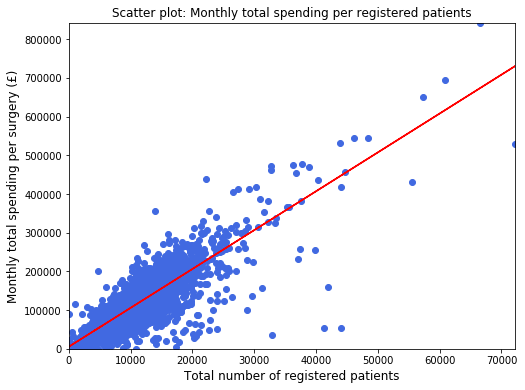

In [83]:
# Ref: Code structure was extracted from DMHR practical lectures.
from math import floor

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

x = merged['number_of_patients'] # values for X axis
y = merged['total_costs_per_practice'] # values for Y axis

ax.scatter(x, y, color='royalblue') # defines parameters for plot

fit = np.polyfit(x, y, deg=1) # defines the trendline associated with the data points
ax.plot(x, fit[0] * x + fit[1], color='red') 

ax.set_title('Scatter plot: Monthly total spending per registered patients')
ax.set_xlabel("Total number of registered patients",fontsize=12)
ax.set_ylabel("Monthly total spending per surgery (£)",fontsize=12)

# defines the maximum values per axis shown in the scatter plot
max_y = floor(merged.total_costs_per_practice.max())
max_x = floor(merged.number_of_patients.max())

ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

# Histogram

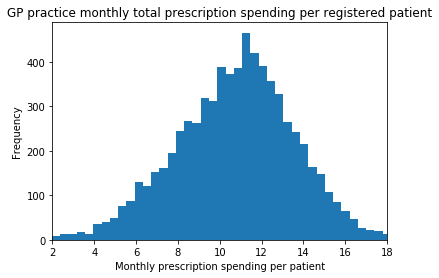

In [84]:
# Ref: Code structure was extracted from DMHR practical lectures.
cost_patient_plot = merged
cost_patient_plot['average_cost_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['number_of_patients'] 

x = cost_patient_plot.average_cost_patient.values

plt.hist(x, bins='auto')
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

min_x = floor(cost_patient_plot['average_cost_patient'].quantile(.01))
max_x = floor(cost_patient_plot['average_cost_patient'].quantile(.99))

plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()

In [191]:
# Following are a series of snippets of code extracted from Stack Overflow and other sources, but I couldn't make them to work 
# as expected to create the Gaussian curve.

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

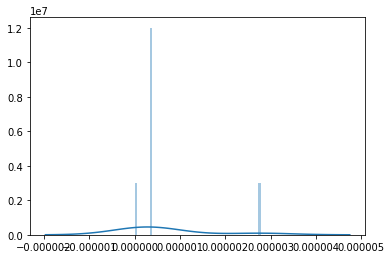

In [168]:
sns.distplot(x)

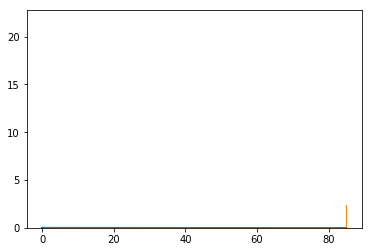

In [190]:
import numpy as np
import scipy.stats as stats
import pylab as pl

fit = stats.norm.pdf(x, np.mean(x), np.std(x))  #this is a fitting indeed

pl.plot(x,fit)

pl.hist(x, bins = 'auto',density=True)      #use this to draw histogram of your data

pl.show()    

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


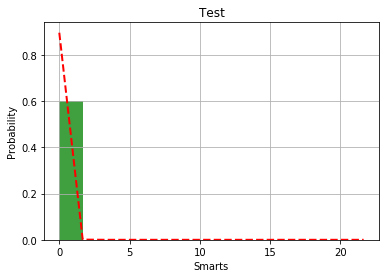

In [193]:
from scipy.stats import norm 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt

#best fit of data
(mu, sigma) = norm.fit(x)

#the histogram of the data
x, bins, patches = plt.hist(x, 'auto', density=1, facecolor='green', alpha=0.75)

#add a 'best fit' line
y = mlab.normpdf( bins , mu, sigma) 
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot 
plt.xlabel('Smarts') 
plt.ylabel('Probability') 
plt.title('Test') 
plt.grid(True)

plt.show()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


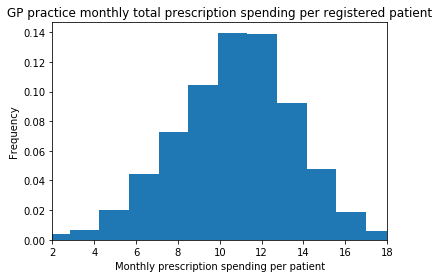

In [198]:
cost_patient_plot = merged 
cost_patient_plot['average_cost_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['number_of_patients']

x = cost_patient_plot.average_cost_patient.values

(mu, sigma) = norm.fit(x)

bins = 2000

plt.hist(x, bins, density = True) 
plt.xlabel("Monthly prescription spending per patient") 
plt.ylabel("Frequency")

y = mlab.normpdf( bins, mu, sigma) 
l = plt.plot(bins, y, 'r', linewidth=2)
min_x = floor(cost_patient_plot['average_cost_patient'].quantile(.01)) 
max_x = floor(cost_patient_plot['average_cost_patient'].quantile(.99)) 
plt.xlim(min_x, max_x) #do not show outliers 
plt.title("GP practice monthly total prescription spending per registered patient") 
plt.show()



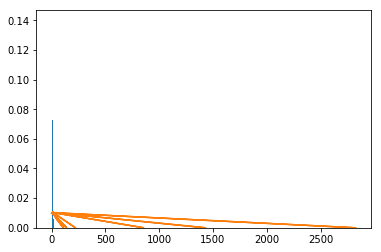

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


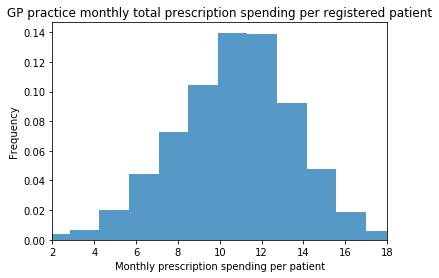

In [202]:
import scipy.stats
import matplotlib.mlab as mlab

cost_patient_plot = merged

cost_patient_plot['average_cost_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['number_of_patients']

x = cost_patient_plot.average_cost_patient.values

mean,std = scipy.stats.norm.fit(x)

#mu = 11.606497

#sigma = 38.868946 
bins = 2000

plt.hist(x, bins=bins, density=True)
xmin, xmax = plt.xlim() 
y= scipy.stats.norm.pdf(x, mean, std) 
plt.plot(x, y) 
plt.show()

#y = scipy.stats.norm.pdf( bins, mu, sigma)

#y = scipy.stats.norm.pdf(x, mu, sigma)

#add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)

l = plt.plot(bins, y, 'r--', linewidth=2)

plt.hist(x, bins, density=True,histtype='bar',alpha=0.75)

plt.xlabel("Monthly prescription spending per patient")

plt.ylabel("Frequency")

min_x = floor(cost_patient_plot['average_cost_patient'].quantile(.01))

max_x = floor(cost_patient_plot['average_cost_patient'].quantile(.99))

plt.xlim(min_x, max_x) #do not show outliers

plt.title("GP practice monthly total prescription spending per registered patient")

plt.show()

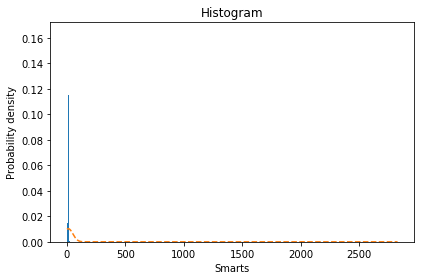

In [200]:

#import matplotlib

#import numpy as np

#import matplotlib.pyplot as plt

x = cost_patient_plot.average_cost_patient.values

mu = 11.606497 
sigma = 38.868946 
bins = 'auto'

fig, ax = plt.subplots()

#the histogram of the data
x, bins, patches = ax.hist(x, bins, density=1)

#add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--') 
ax.set_xlabel('Smarts') 
ax.set_ylabel('Probability density') 
ax.set_title(r'Histogram')

#Tweak spacing to prevent clipping of ylabel
fig.tight_layout() 
plt.show()

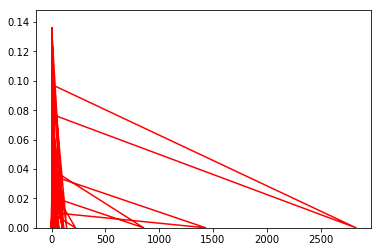

In [201]:
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt

gamma = stats.gamma 
a, loc, scale = 3, 0, 2 
size = 20000 
y = gamma.rvs(a, loc, scale, size=size)

x = cost_patient_plot.average_cost_patient.values

#fit¶
param = gamma.fit(y, floc=0) 
pdf_fitted = gamma.pdf(x, *param) 
plt.plot(x, pdf_fitted, color='r')

#plot the histogram
plt.hist(y, density=True, bins='auto')

plt.show()


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


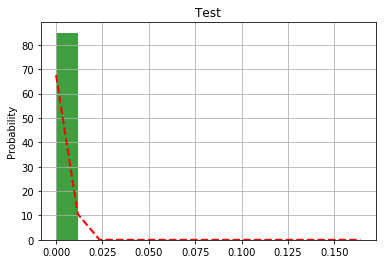

In [189]:
from scipy.stats import norm 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt

#best fit of data
(mu, sigma) = norm.fit(x)

#the histogram of the data
x, bins, patches = plt.hist(x, 'auto', density=1, facecolor='green', alpha=0.75)

#add a 'best fit' line
y = mlab.normpdf( bins , mu, sigma) 
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot plt.xlabel('Smarts') 
plt.ylabel('Probability') 
plt.title('Test') 
plt.grid(True)

plt.show()

# ASSIGNMENT B

## Question B.1

In [92]:
# read country codes csv into a DataFrame
# https://www.who.int/healthinfo/statistics/country_codes.zip?ua=1
country_codes = pd.read_csv('D:\DATA\WHO\country_codes\country_codes.csv', sep=',',index_col= 'name').rename(columns=lambda x: x.strip())
country_codes.head()

,country
name,
Algeria,1010
Angola,1020
Benin,1025
Botswana,1030
Burkina Faso,1035


In [93]:
# read population data csv into a DataFrame
# https://www.who.int/healthinfo/Pop.zip?ua=1
population_data = pd.read_csv('D:\DATA\WHO\Pop\pop.csv', sep=',',index_col=False).rename(columns=lambda x: x.lower().strip())
population_data.head()

,country,admin1,subdiv,year,sex,frmat,pop1,pop2,pop3,pop4,...,pop18,pop19,pop20,pop21,pop22,pop23,pop24,pop25,pop26,lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [94]:
italy_code = country_codes.loc['Italy','country']
italy_code
iceland_code = country_codes.loc['Iceland','country']
iceland_code
nz_code = country_codes.loc['New Zealand','country']
nz_code
print("Italy's code is " + str(italy_code) + ".")
print("Iceland's code is " + str(iceland_code) + ".")
print("New Zealands's code is " + str(nz_code) + ".")

Italy's code is 4180.
Iceland's code is 4160.
New Zealands's code is 5150.


In [95]:
# Reads both parts of the ICD-10 mortality csv data and joins them through concatenation into one DataFrame
icd10_data1 = pd.read_csv('D:\DATA\WHO\Morticd10\Morticd10_part1.csv', sep=',',index_col=False).rename(columns=lambda x: x.lower().strip())
#icd10_data1.head()
icd10_data2 = pd.read_csv('D:\DATA\WHO\Morticd10\Morticd10_part2.csv', sep=',',index_col=False).rename(columns=lambda x: x.lower().strip())
#icd10_data2.head()
icd10_data = pd.concat([icd10_data1, icd10_data2])
icd10_data = icd10_data.reset_index(drop=True)
icd10_data.head()

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [96]:
# prints each country population and deaths from all causes for the year 2010.

countries = [iceland_code,  nz_code, italy_code] 

for country_code in countries:
    
    country_pop = population_data[(population_data.year == 2010) & (population_data.country == country_code)]
    total_pop = country_pop.pop1.sum()
    
    country_deaths = icd10_data[(icd10_data.year == 2010) & (icd10_data.country == country_code)]
    total_deaths = country_deaths.deaths1[icd10_data.cause == 'AAA'].sum()
   
    print(str(country_codes.country[country_codes.country == country_code].index.tolist()[0]) + "'s population in the year 2010 was " + str("{:,}".format(int(total_pop))) + ", and its total deaths during the same year were " + str("{:,}".format(int(total_deaths))) + ".")

Iceland's population in the year 2010 was 318,041, and its total deaths during the same year were 2,019.
New Zealand's population in the year 2010 was 4,367,360, and its total deaths during the same year were 28,649.
Italy's population in the year 2010 was 60,483,386, and its total deaths during the same year were 584,615.


# Question B.2

In [97]:
# Filters the ICD-10 data to extract the information from Italy and the "All causes" code ("AAA") 
italy_total_deaths = icd10_data[(icd10_data.country == italy_code) & (icd10_data.cause == "AAA")] 
italy_total_deaths.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
1053442,4180,NaN,NaN,2003,104,AAA,1,0,1,289826,...,50840.0,48917.0,35681.0,24282.0,6180.0,0.0,291.0,302.0,231.0,322.0
1053443,4180,NaN,NaN,2003,104,AAA,2,0,1,299071,...,40788.0,55353.0,57825.0,53942.0,21258.0,0.0,253.0,232.0,217.0,286.0
1058462,4180,NaN,NaN,2004,104,AAA,1,0,1,272864,...,47357.0,49898.0,29323.0,22905.0,5904.0,26.0,310.0,320.0,222.0,337.0
1058463,4180,NaN,NaN,2004,104,AAA,2,0,1,272187,...,36708.0,55649.0,45825.0,48854.0,19869.0,9.0,258.0,247.0,207.0,267.0
2941112,4180,NaN,NaN,2005,104,AAA,1,0,1,280698,...,48390.0,53233.0,31563.0,24690.0,7128.0,37.0,304.0,301.0,235.0,329.0


In [98]:
# Sums the totals for every age group through the years
x = italy_total_deaths.loc[:, 'deaths2':'deaths25'].sum() 
x

deaths2       24376.0
deaths3        1631.0
deaths4        1084.0
deaths5         913.0
deaths6         814.0
deaths7        3115.0
deaths8        3877.0
deaths9       11356.0
deaths10      17256.0
deaths11      21401.0
deaths12      28433.0
deaths13      42585.0
deaths14      67214.0
deaths15     102029.0
deaths16     148422.0
deaths17     220350.0
deaths18     326675.0
deaths19     482188.0
deaths20     714784.0
deaths21    1059942.0
deaths22    1441230.0
deaths23    1434751.0
deaths24    1018494.0
deaths25     467123.0
dtype: float64

In [99]:
age_groups = ("0 year","1 year", "2 years", "3 years", "4 years", "5-9 years", "10-14 years", "15-19 years", "20-24 years", "25-29 years",
         "30-34 years", "35-39 years", "40-44 years", "45-49 years", "50-54 years", "55-59 years", "60-64 years", "65-69 years",
         "70-74 years", "75-79 years", "80-84 years", "85-89 years", "90-94 years", "95+ years")

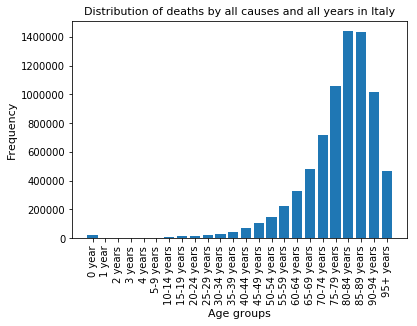

In [100]:
plt.xlabel('Age groups', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of deaths by all causes and all years in Italy',fontsize=11)
plt.xticks(rotation=90)

plt.bar(age_groups,x)
plt.show()

# Question B.3

In [101]:
# Creates a list of the categories inside the Neoplasms group 
icdlist = []
neoplsms_group = ["C", "D"]

for neoplsms_group in neoplsms_group:

    if neoplsms_group == "C":

        for i in range(0,98):
            if i < 10:
                icdlist.append("C0" + str(i))
            else:
                icdlist.append("C" + str(i))
        
    else:
        for i in range(0, 49):
            if i < 10:
                icdlist.append("D0" + str(i))
            else:
                icdlist.append("D" + str(i))

print(icdlist)

['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'D00', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44'

In [102]:
# Creates a new DF with only the deaths from Neoplasms in Italy
italy_neo_deaths = pd.DataFrame()

for group in icdlist:
    italy_neo_deaths = italy_neo_deaths.append(icd10_data[(icd10_data.country == italy_code) & (icd10_data.cause.str.startswith(group))])
    
italy_neo_deaths.reset_index(drop=True).head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
0,4180,NaN,NaN,2003,104,C000,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4180,NaN,NaN,2003,104,C000,2,0,1,7,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4180,NaN,NaN,2003,104,C001,1,0,1,21,...,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4180,NaN,NaN,2003,104,C001,2,0,1,5,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4180,NaN,NaN,2003,104,C009,1,0,1,24,...,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# keeps the first 3 characters of the ICD-10 death causes code and discards the rest
italy_neo_deaths['cause'] = italy_neo_deaths['cause'].apply(lambda x: x[0:3])
italy_neo_deaths.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
1053596,4180,NaN,NaN,2003,104,C00,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053597,4180,NaN,NaN,2003,104,C00,2,0,1,7,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
1053598,4180,NaN,NaN,2003,104,C00,1,0,1,21,...,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053599,4180,NaN,NaN,2003,104,C00,2,0,1,5,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1053600,4180,NaN,NaN,2003,104,C00,1,0,1,24,...,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# groups data according to cause of death and sums up the data of each column

italy_neo_sums = italy_neo_deaths.groupby('cause').sum()
italy_neo_sums.reset_index().head(15)

,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
0,C00,351120,0.0,168759,123,0,84,783,0.0,0.0,...,133.0,152.0,169.0,86.0,48.0,0.0,0.0,0.0,0.0,0.0
1,C01,108680,0.0,52234,39,0,26,1359,0.0,0.0,...,170.0,133.0,87.0,28.0,9.0,0.0,0.0,0.0,0.0,0.0
2,C02,296780,0.0,142657,98,0,71,5989,0.0,0.0,...,755.0,807.0,489.0,257.0,68.0,0.0,0.0,0.0,0.0,0.0
3,C03,271700,0.0,130591,97,0,65,329,0.0,0.0,...,52.0,61.0,40.0,30.0,9.0,0.0,0.0,0.0,0.0,0.0
4,C04,121220,0.0,58263,43,0,29,585,0.0,0.0,...,69.0,63.0,34.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0
5,C05,426360,0.0,204903,151,0,102,1017,0.0,0.0,...,148.0,129.0,79.0,50.0,20.0,0.0,0.0,0.0,0.0,0.0
6,C06,413820,0.0,198890,143,0,99,6786,0.0,0.0,...,887.0,879.0,609.0,364.0,122.0,0.0,0.0,0.0,0.0,0.0
7,C07,108680,0.0,52234,39,0,26,3214,0.0,0.0,...,417.0,601.0,543.0,382.0,130.0,0.0,0.0,0.0,0.0,0.0
8,C08,238260,0.0,114508,84,0,57,786,0.0,0.0,...,94.0,107.0,87.0,45.0,16.0,0.0,0.0,0.0,0.0,0.0
9,C09,221540,0.0,106477,72,0,53,2390,0.0,0.0,...,307.0,212.0,126.0,50.0,14.0,0.0,0.0,0.0,0.0,0.0


In [105]:
italy_overall_deaths = italy_total_deaths.deaths1.sum()
#italy_overall_deaths
print("Across all years there were " + str("{:,}".format(int(italy_overall_deaths))) + " deaths in Italy.")

Across all years there were 7,640,383 deaths in Italy.


In [106]:
# Calculates death percentage for every neoplasm cause in relation to overall deaths.
italy_neo_sums['death_pct'] = italy_neo_sums['deaths1'] / italy_overall_deaths * 100
italy_neo_sums.head()

,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,deaths4,...,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4,death_pct
cause,,,,,,,,,,,,,,,,,,,,,
C00,351120,0.0,168759,123,0,84,783,0.0,0.0,0.0,...,152.0,169.0,86.0,48.0,0.0,0.0,0.0,0.0,0.0,0.010248
C01,108680,0.0,52234,39,0,26,1359,0.0,0.0,0.0,...,133.0,87.0,28.0,9.0,0.0,0.0,0.0,0.0,0.0,0.017787
C02,296780,0.0,142657,98,0,71,5989,0.0,0.0,0.0,...,807.0,489.0,257.0,68.0,0.0,0.0,0.0,0.0,0.0,0.078386
C03,271700,0.0,130591,97,0,65,329,0.0,0.0,0.0,...,61.0,40.0,30.0,9.0,0.0,0.0,0.0,0.0,0.0,0.004306
C04,121220,0.0,58263,43,0,29,585,0.0,0.0,0.0,...,63.0,34.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.007657


In [107]:
italy_top5 = italy_neo_sums.sort_values('deaths1', ascending = False).head(5).reset_index()
italy_top5

,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,...,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4,death_pct
0,C34,635360,0.0,305347,227,0,152,430069,3.0,0.0,...,68580.0,35070.0,10792.0,1994.0,1.0,1.0,0.0,1.0,1.0,5.628893
1,C18,1070080,0.0,514286,384,0,256,182802,0.0,0.0,...,34955.0,25644.0,12090.0,3345.0,0.0,0.0,0.0,0.0,0.0,2.392576
2,C50,254980,0.0,122511,100,0,61,156002,0.0,0.0,...,21501.0,17241.0,9823.0,3677.0,0.0,0.0,0.0,0.0,0.0,2.041809
3,C16,848540,0.0,407824,304,0,203,132676,0.0,1.0,...,24208.0,17620.0,8491.0,2178.0,0.0,0.0,0.0,0.0,0.0,1.736510
4,C25,836000,0.0,401810,299,0,200,132125,0.0,0.0,...,22529.0,14449.0,6189.0,1459.0,1.0,0.0,0.0,0.0,0.0,1.729298


In [108]:
# Takes the top 5 causes of death and tabulates the number of deaths and their percentage of overall deaths
italy_top5_sliced = italy_top5[['cause', 'deaths1', 'death_pct']]
italy_top5_sliced

,cause,deaths1,death_pct
0,C34,430069,5.628893
1,C18,182802,2.392576
2,C50,156002,2.041809
3,C16,132676,1.736510
4,C25,132125,1.729298


The top five causes of death in Italy in the Neoplasm category were:

* C34	Malignant neoplasm of bronchus and lung	
* C18	Malignant neoplasm of colon	
* C50	Malignant neoplasm of breast	
* C16	Malignant neoplasm of stomach	
* C25	Malignant neoplasm of pancreas	

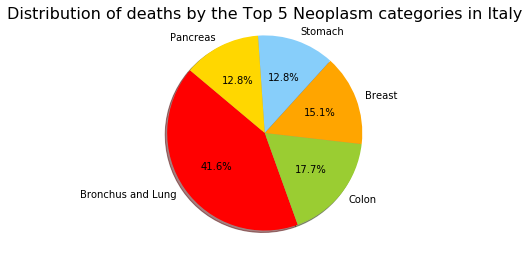

In [109]:
# Data to pie chart. Also calculates the proportion of deaths relative to the top five categories.

labels = 'Bronchus and Lung', 'Colon', 'Breast', 'Stomach', 'Pancreas'
sizes = [430069, 182802, 156002, 132676, 132125]
colors = ['red', 'yellowgreen', 'orange', 'lightskyblue','gold']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of deaths by the Top 5 Neoplasm categories in Italy',fontsize=16)
plt.axis('equal')
plt.show()

# Question B.4

In [110]:
# Extracts Australia's Code, and creates a new DF for the year 2010 with only causes of death from the Neoplasms group
australia_code = country_codes.loc['Australia','country']

au_neo_deaths = pd.DataFrame()

for group in icdlist:
    au_neo_deaths = au_neo_deaths.append(icd10_data[(icd10_data.year == 2010) & (icd10_data.country == australia_code) & (icd10_data.cause.str.startswith(group))])

au_neo_deaths.reset_index(drop=True)
au_neo_deaths.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
3532600,5020,NaN,NaN,2010,104,C001,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532601,5020,NaN,NaN,2010,104,C001,2,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532602,5020,NaN,NaN,2010,104,C009,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532603,5020,NaN,NaN,2010,104,C009,2,0,1,5,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3532604,5020,NaN,NaN,2010,104,C01,1,0,1,20,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# Keeps the first 3 characters from the cause ICD-10 code.
au_neo_deaths['cause'] = au_neo_deaths['cause'].apply(lambda x: x[0:3])
au_neo_deaths.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
3532600,5020,NaN,NaN,2010,104,C00,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532601,5020,NaN,NaN,2010,104,C00,2,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532602,5020,NaN,NaN,2010,104,C00,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532603,5020,NaN,NaN,2010,104,C00,2,0,1,5,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3532604,5020,NaN,NaN,2010,104,C01,1,0,1,20,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
au = au_neo_deaths.sum()
au

country                                                 2821240
admin1                                                        0
subdiv                                                        0
year                                                    1129620
list                                                      58448
cause         C00C00C00C00C01C01C02C02C02C02C03C03C03C03C03C...
sex                                                         835
frmat                                                         0
im_frmat                                                    562
deaths1                                                   43316
deaths2                                                      11
deaths3                                                       7
deaths4                                                      11
deaths5                                                       7
deaths6                                                       8
deaths7                                 

In [113]:
# Creates a DF with the age groups, resets the index, renames the columns
au_deaths = pd.DataFrame(au[10:-5])
au_deaths.reset_index(inplace = True)
au_deaths.columns = ['age_group', 'deaths']
au_deaths

,age_group,deaths
0,deaths2,11
1,deaths3,7
2,deaths4,11
3,deaths5,7
4,deaths6,8
5,deaths7,46
6,deaths8,31
7,deaths9,50
8,deaths10,52
9,deaths11,97


There is clearly a difference in mortality from neoplasms across the different age groups in Australia.

In [114]:
# Sorts the different age groups according to the number of deaths.
au_deaths.sort_values('deaths', ascending = False).head(5)

,age_group,deaths
20,deaths22,7167
19,deaths21,6291
18,deaths20,5713
21,deaths23,5520
17,deaths19,4768


The top five age groups that have the highest mortality by neoplasms are:

* 1st: 80-84 years
* 2nd: 75-79 years
* 3rd: 70-74 years
* 4th: 85-89 years
* 5th: 65-69 years

Given the age of the groups with the highest mortality, this suggests that age is one of the biggest factors for appearance of neoplasms.

# Question B.5

In [115]:
# Creates a new DF with only the deaths from Neoplasms in Italy
italy_neo_deaths_2010 = pd.DataFrame()

for group in icdlist:
    italy_neo_deaths_2010 = italy_neo_deaths_2010.append(icd10_data[(icd10_data.country == italy_code) & (icd10_data.year == 2010) &(icd10_data.cause.str.startswith(group))])
    
italy_neo_deaths_2010.reset_index(drop=True).head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
0,4180,NaN,NaN,2010,104,C000,1,0,1,3,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4180,NaN,NaN,2010,104,C000,2,0,1,4,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,4180,NaN,NaN,2010,104,C001,1,0,1,17,...,3.0,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4180,NaN,NaN,2010,104,C001,2,0,1,10,...,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4180,NaN,NaN,2010,104,C006,1,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# keeps the first 3 characters of the ICD-10 death causes code and discards the rest
italy_neo_deaths_2010['cause'] = italy_neo_deaths_2010['cause'].apply(lambda x: x[0:3])
italy_neo_deaths_2010.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
2965693,4180,NaN,NaN,2010,104,C00,1,0,1,3,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965694,4180,NaN,NaN,2010,104,C00,2,0,1,4,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2965695,4180,NaN,NaN,2010,104,C00,1,0,1,17,...,3.0,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2965696,4180,NaN,NaN,2010,104,C00,2,0,1,10,...,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965697,4180,NaN,NaN,2010,104,C00,1,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
italy_neo_sums_2010 = italy_neo_deaths_2010.groupby('cause').sum()
italy_neo_sums_2010.reset_index().head(15)

,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
0,C00,29260,0.0,14070,10,0,7,66,0.0,0.0,...,13.0,15.0,23.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0
1,C01,8360,0.0,4020,3,0,2,95,0.0,0.0,...,11.0,10.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,C02,25080,0.0,12060,7,0,6,461,0.0,0.0,...,62.0,55.0,40.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0
3,C03,25080,0.0,12060,9,0,6,32,0.0,0.0,...,6.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C04,12540,0.0,6030,4,0,3,43,0.0,0.0,...,7.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C05,33440,0.0,16080,12,0,8,74,0.0,0.0,...,12.0,12.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
6,C06,37620,0.0,18090,13,0,9,514,0.0,0.0,...,65.0,68.0,51.0,19.0,7.0,0.0,0.0,0.0,0.0,0.0
7,C07,8360,0.0,4020,3,0,2,243,0.0,0.0,...,21.0,55.0,52.0,21.0,9.0,0.0,0.0,0.0,0.0,0.0
8,C08,20900,0.0,10050,7,0,5,70,0.0,0.0,...,6.0,12.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
9,C09,16720,0.0,8040,5,0,4,206,0.0,0.0,...,26.0,22.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# From question 1
italy_overall_deaths_2010 = 584615

In [119]:
italy_neo_sums_2010['death_pct'] = italy_neo_sums_2010['deaths1'] / italy_overall_deaths_2010 * 100
italy_neo_sums_2010.reset_index(inplace = True)

In [120]:
italy_neo_sums_2010.head()

,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,...,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4,death_pct
0,C00,29260,0.0,14070,10,0,7,66,0.0,0.0,...,15.0,23.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.011289
1,C01,8360,0.0,4020,3,0,2,95,0.0,0.0,...,10.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.016250
2,C02,25080,0.0,12060,7,0,6,461,0.0,0.0,...,55.0,40.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,0.078855
3,C03,25080,0.0,12060,9,0,6,32,0.0,0.0,...,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005474
4,C04,12540,0.0,6030,4,0,3,43,0.0,0.0,...,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007355


In [140]:
italy_neo_sums_2010_sorted = italy_neo_sums_2010.sort_values('death_pct', ascending = False).head(5)
italy_neo_sums_2010_sorted

,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,...,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4,death_pct
31,C34,50160,0.0,24120,18,0,12,33696,0.0,0.0,...,5692.0,3135.0,762.0,178.0,0.0,0.0,0.0,0.0,0.0,5.763793
18,C18,83600,0.0,40200,30,0,20,14547,0.0,0.0,...,2788.0,2357.0,783.0,323.0,0.0,0.0,0.0,0.0,0.0,2.488304
44,C50,20900,0.0,10050,8,0,5,12238,0.0,0.0,...,1724.0,1546.0,624.0,343.0,0.0,0.0,0.0,0.0,0.0,2.093343
25,C25,62700,0.0,30150,23,0,15,10512,0.0,0.0,...,1781.0,1326.0,417.0,136.0,0.0,0.0,0.0,0.0,0.0,1.798106
16,C16,71060,0.0,34170,26,0,17,10075,0.0,1.0,...,1857.0,1533.0,543.0,195.0,0.0,0.0,0.0,0.0,0.0,1.723356


The top five causes of death in Italy in the Neoplasm category during the year 2010 were:

* C34	Malignant neoplasm of bronchus and lung	
* C18	Malignant neoplasm of colon	
* C50	Malignant neoplasm of breast	
* C16	Malignant neoplasm of stomach	
* C25	Malignant neoplasm of pancreas	

In 2010, stomach neoplasms were ranked 4th between the top five causes of neoplasms deaths in Italy, compared to the overall deaths calculated previously.

In [141]:
australia_code = country_codes.loc['Australia','country']

au_neo_deaths_2010 = pd.DataFrame()

for group in icdlist:
    au_neo_deaths_2010 = au_neo_deaths_2010.append(icd10_data[(icd10_data.year == 2010) & (icd10_data.country == australia_code) & (icd10_data.cause.str.startswith(group))])

au_neo_deaths_2010.reset_index(drop=True)
au_neo_deaths_2010.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
3532600,5020,NaN,NaN,2010,104,C001,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532601,5020,NaN,NaN,2010,104,C001,2,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532602,5020,NaN,NaN,2010,104,C009,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532603,5020,NaN,NaN,2010,104,C009,2,0,1,5,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3532604,5020,NaN,NaN,2010,104,C01,1,0,1,20,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
au_neo_deaths_2010['cause'] = au_neo_deaths_2010['cause'].apply(lambda x: x[0:3])
au_neo_deaths_2010.head()

,country,admin1,subdiv,year,list,cause,sex,frmat,im_frmat,deaths1,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
3532600,5020,NaN,NaN,2010,104,C00,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532601,5020,NaN,NaN,2010,104,C00,2,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532602,5020,NaN,NaN,2010,104,C00,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532603,5020,NaN,NaN,2010,104,C00,2,0,1,5,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3532604,5020,NaN,NaN,2010,104,C01,1,0,1,20,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
au_neo_sums_2010 = au_neo_deaths_2010.groupby('cause').sum()
au_neo_sums_2010.head()

,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,deaths4,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
cause,,,,,,,,,,,,,,,,,,,,,
C00,20080,0.0,8040,6,0,4,11,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
C01,10040,0.0,4020,3,0,2,27,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C02,20080,0.0,8040,5,0,4,177,0.0,0.0,0.0,...,24.0,20.0,13.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
C03,30120,0.0,12060,9,0,6,14,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C04,10040,0.0,4020,3,0,2,27,0.0,0.0,0.0,...,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
au_neo_sums_2010.reset_index(inplace = True)
au_neo_sums_2010.head()

,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,deaths3,...,deaths21,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4
0,C00,20080,0.0,8040,6,0,4,11,0.0,0.0,...,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,C01,10040,0.0,4020,3,0,2,27,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C02,20080,0.0,8040,5,0,4,177,0.0,0.0,...,24.0,20.0,13.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
3,C03,30120,0.0,12060,9,0,6,14,0.0,0.0,...,1.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,C04,10040,0.0,4020,3,0,2,27,0.0,0.0,...,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
australia_code = country_codes.loc['Australia','country']

au_deaths = icd10_data[(icd10_data.year == 2010) & (icd10_data.country == australia_code)]
au_all_deaths_2010 = au_deaths.deaths1[icd10_data.cause == 'AAA'].sum()
au_all_deaths_2010

143473

During 2010, there were 143,473 total deaths in Australia.

In [146]:
au_neo_sums_2010['death_pct'] = au_neo_sums_2010['deaths1'] / au_all_deaths_2010 * 100
au_neo_sums_2010.reset_index(inplace = True)

In [129]:
au_neo_sums_2010.head(10)

,index,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,...,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4,death_pct
0,0,C00,20080,0.0,8040,6,0,4,11,0.0,...,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.007667
1,1,C01,10040,0.0,4020,3,0,2,27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018819
2,2,C02,20080,0.0,8040,5,0,4,177,0.0,...,20.0,13.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.123368
3,3,C03,30120,0.0,12060,9,0,6,14,0.0,...,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.009758
4,4,C04,10040,0.0,4020,3,0,2,27,0.0,...,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018819
5,5,C05,30120,0.0,12060,9,0,6,20,0.0,...,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013940
6,6,C06,35140,0.0,14070,11,0,7,59,0.0,...,7.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.041123
7,7,C07,10040,0.0,4020,3,0,2,71,0.0,...,15.0,11.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.049487
8,8,C08,20080,0.0,8040,6,0,4,17,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.011849
9,9,C09,20080,0.0,8040,5,0,4,76,0.0,...,6.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052972


In [147]:
au_neo_sums_2010_sorted = au_neo_sums_2010.sort_values('death_pct', ascending = False).head(5)
au_neo_sums_2010_sorted

,index,cause,country,admin1,year,sex,frmat,im_frmat,deaths1,deaths2,...,deaths22,deaths23,deaths24,deaths25,deaths26,im_deaths1,im_deaths2,im_deaths3,im_deaths4,death_pct
31,31,C34,50200,0.0,20100,15,0,10,8098,0.0,...,1288.0,809.0,226.0,53.0,0.0,0.0,0.0,0.0,0.0,5.644268
54,54,C61,5020,0.0,2010,1,0,1,3236,0.0,...,776.0,677.0,332.0,86.0,0.0,0.0,0.0,0.0,0.0,2.255477
44,44,C50,15060,0.0,6030,4,0,3,2866,0.0,...,329.0,323.0,153.0,67.0,0.0,0.0,0.0,0.0,0.0,1.997588
70,70,C80,10040,0.0,4020,3,0,2,2783,0.0,...,536.0,463.0,213.0,75.0,0.0,0.0,0.0,0.0,0.0,1.939738
25,25,C25,60240,0.0,24120,18,0,12,2434,0.0,...,433.0,270.0,105.0,38.0,0.0,0.0,0.0,0.0,0.0,1.696486


The top five causes of death in Australia in the Neoplasm category during the year 2010 were:

* C34	Malignant neoplasm of bronchus and lung	
* C61	Malignant neoplasm of prostate	
* C50	Malignant neoplasm of breast	
* C80	Malignant neoplasm, without specification of site	
* C25	Malignant neoplasm of pancreas

In [148]:
# selects only columns of interest for Italy's 2010 top 5 neoplasms deaths
it_top5_neo_2010 = italy_neo_sums_2010_sorted[['cause', 'deaths1', 'death_pct']]
it_top5_neo_2010

,cause,deaths1,death_pct
31,C34,33696,5.763793
18,C18,14547,2.488304
44,C50,12238,2.093343
25,C25,10512,1.798106
16,C16,10075,1.723356


In [149]:
# Calculates frequency, out of overall deaths, of each cause of death in the Top 5 for Italy
it_top5_neo_2010['freq'] = it_top5_neo_2010['deaths1'] / italy_overall_deaths_2010 * 100000
it_top5_neo_2010

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cause,deaths1,death_pct,freq
31,C34,33696,5.763793,5763.793266
18,C18,14547,2.488304,2488.304269
44,C50,12238,2.093343,2093.343482
25,C25,10512,1.798106,1798.106446
16,C16,10075,1.723356,1723.356397


In [150]:
# selects only columns of interest for Australia's 2010 top 5 neoplasms deaths

au_top5_neo_2010 = au_neo_sums_2010_sorted[['cause', 'deaths1', 'death_pct']]
au_top5_neo_2010

,cause,deaths1,death_pct
31,C34,8098,5.644268
54,C61,3236,2.255477
44,C50,2866,1.997588
70,C80,2783,1.939738
25,C25,2434,1.696486


In [151]:
# Calculates frequency of each cause of death in the Top 5 for Australia
au_top5_neo_2010['freq'] = au_top5_neo_2010['deaths1'] / au_all_deaths_2010 * 100000
au_top5_neo_2010

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cause,deaths1,death_pct,freq
31,C34,8098,5.644268,5644.267563
54,C61,3236,2.255477,2255.476640
44,C50,2866,1.997588,1997.588396
70,C80,2783,1.939738,1939.737790
25,C25,2434,1.696486,1696.486447


In [156]:
#creates a new dataframe with a multi index for creating a stacked bar plot
# Ref: the structure of the code was extracted from Stacked Overflow
frames = [au_top5_neo_2010, it_top5_neo_2010]

aus_ita_df = pd.concat(frames, keys=['Australia', 'Italy'])
c_freq_aus_ita_df = aus_ita_df[['cause', 'freq']]
c_freq_aus_ita_df.set_index('cause')

c_freq_aus_ita_df.index.names = ['country', 'index']
c_freq_aus_ita_df.set_index = ['country', 'cause']
c_freq_aus_ita_df.unstack('index')
c_freq_aus_ita_df

cause         freq
country   index                   
Australia 31      C34  5644.267563
          54      C61  2255.476640
          44      C50  1997.588396
          70      C80  1939.737790
          25      C25  1696.486447
Italy     31      C34  5763.793266
          18      C18  2488.304269
          44      C50  2093.343482
          25      C25  1798.106446
          16      C16  1723.356397

In [153]:
# Replaces the ICD-10 neoplasm codes to something more easily readable
cause_dict = {'C34': 'lung',
              'C61': 'prostate',
              'C50': 'breast',
              'C80': 'without specification',
              'C25': 'pancreas',
              'C18': 'colon',
              'C16': 'stomach'
             }
c_freq_aus_ita_df.cause = c_freq_aus_ita_df.cause.replace(cause_dict)
c_freq_aus_ita_df

cause         freq
country   index                                    
Australia 31                      lung  5644.267563
          54                  prostate  2255.476640
          44                    breast  1997.588396
          70     without specification  1939.737790
          25                  pancreas  1696.486447
Italy     31                      lung  5763.793266
          18                     colon  2488.304269
          44                    breast  2093.343482
          25                  pancreas  1798.106446
          16                   stomach  1723.356397

Text(0, 0.5, 'Frequency every 100,000 deaths')

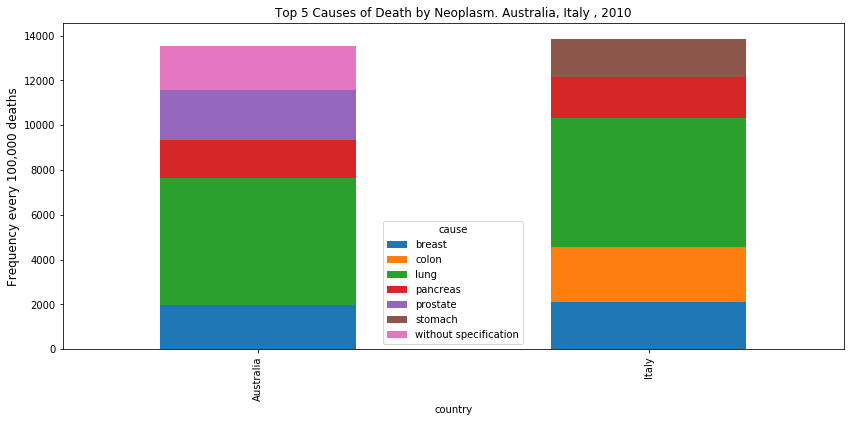

In [154]:
# unstacks the values from the indexes in the dataframe and creates a stacked bar plot from the frequencies
# Ref: Code structure was extracted from Stack Overflow
ax =c_freq_aus_ita_df.reset_index().pivot_table(index="cause", columns="country", values="freq").T.plot(kind='bar', title='Top 5 Causes of Death by Neoplasm. Australia, Italy , 2010', stacked=True, figsize=(14, 6))
ax.set_ylabel('Frequency every 100,000 deaths',fontsize=12)